<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.877 · Análisis de sentimientos y textos</p>
<p style="margin: 0; text-align:right;">Máster Universitario de Ciencia de Datos(Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicacions</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# PRA 3: Deep Learning para el análisis de textos 

En esta práctica revisaremos y aplicaremos los conocimientos aprendidos en los módulos 5 y 6. En concreto trataremos los siguientes temas:

1. **Traducción automatica**: con custom embeddings y con embeddings preentrenados.
2. **Classificación de frases**: Aplicación de los conceptos ya trabajados para la reutilización de la arquitectura de dos modelos.

3. **Detección de NER y NEL**: detección y clasificación de entidades nombradas (NER) y entity linking basandonos en los temas ya trabajados en los notebooks de NER y NEL y añadiendo un ejemplo sencillo de transformers. 

También incluimos algunos otros temas transversales trabajados a lo largo de la asignatura.


# PARTE 1

En esta primera parte de la práctica se pide resolver los ejercicios usando la libreria **KERAS**.

# 1. Traducción Automática (4 puntos)




## 1.1 TA con Custom Embeddings (2 puntos)


El objetivo de este apartado es entrenar un modelo de traducción automática entre inglés y castellano, siguento los mismos pasos que en el notebook de Machine Translation del mòdulo 5. 


**Implementación**: Siguiendo los pasos trabajados en el notebook de traducción automática, implementar y entrenar un modelo de traducción automática, del inglés al castellano.  

+ La capa embedding debe de tener una dimensión igual a 300 
+ Se recomienda una longitud màxima de secuencia de 12
+ Se recomienda utilitzar los primeros 50000 pares del corpus de en-es.txt <br>
    
Mostrad la aplicación del modelo entrenado con algún ejemplo.

In [1]:
# !pip install numpy==1.19.5

In [2]:
# Importamos las librerías necesarias

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# Librerisas para parte 2
import matplotlib.pyplot as plt
import seaborn as sns

from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer

import string

import os


from sklearn.model_selection import train_test_split







2022-06-13 20:54:40.692217: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2022-06-13 20:54:42.141894: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.0: cannot open shared object file: No such file or directory
2022-06-13 20:54:42.142067: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-06-13 20:54:42.142076: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


Primero deberéis cargar los datos proporcionados, que encontraréis en el fichero mt/en-es.txt 

In [3]:
pwd

'/home/oscar/Documentos/oscar/nlp/nlp/PRA 3: Deep Learning para el análisis de textos y sentimientos'

In [4]:
#############################################
# SOLUCIÓN                                  #
#############################################
# ! rm -r data/
# ! unzip mt.zip -d data/
# ! unzip ner.zip -d data/
# load file data/mt/en-es.txt
en_words = []
es_words = []

with open("data/mt/en-es.txt", "r") as file:
    for line in file:
        line = line.strip()
        if line:
            en, es = line.split("\t")
            en_words.append(en)
            es_words.append(es)

In [5]:
en_words[:10]

["Let's try something.",
 'I have to go to sleep.',
 "Today is June 18th and it is Muiriel's birthday!",
 "Today is June 18th and it is Muiriel's birthday!",
 'Muiriel is 20 now.',
 'Muiriel is 20 now.',
 'The password is "Muiriel".',
 'I will be back soon.',
 'I will be back soon.',
 'I will be back soon.']

In [6]:
es_words[:10]

['¡Intentemos algo!',
 'Tengo que irme a dormir.',
 '¡Hoy es 18 de junio y es el cumpleaños de Muiriel!',
 '¡Hoy es el 18 de junio y es el cumpleaños de Muiriel!',
 'Ahora, Muiriel tiene 20 años.',
 'Muiriel tiene 20 años ahora.',
 'La contraseña es "Muiriel".',
 'Volveré pronto.',
 'Vuelvo en seguida.',
 'Yo regresaré pronto.']

Preprocesar los datos, para eliminar puntuaciones y poner en minúscula

In [7]:
#############################################
# SOLUCIÓN                                  #
#############################################

# put all in lower case
es_words = [word.lower() for word in es_words]
# remove punctuation
es_words = [word.translate(str.maketrans('', '', string.punctuation)) for word in es_words]
es_words [:10]


['¡intentemos algo',
 'tengo que irme a dormir',
 '¡hoy es 18 de junio y es el cumpleaños de muiriel',
 '¡hoy es el 18 de junio y es el cumpleaños de muiriel',
 'ahora muiriel tiene 20 años',
 'muiriel tiene 20 años ahora',
 'la contraseña es muiriel',
 'volveré pronto',
 'vuelvo en seguida',
 'yo regresaré pronto']

In [8]:
en_words = [word.lower() for word in en_words]
en_words = [word.translate(str.maketrans('', '', string.punctuation)) for word in en_words]
en_words [:10]




['lets try something',
 'i have to go to sleep',
 'today is june 18th and it is muiriels birthday',
 'today is june 18th and it is muiriels birthday',
 'muiriel is 20 now',
 'muiriel is 20 now',
 'the password is muiriel',
 'i will be back soon',
 'i will be back soon',
 'i will be back soon']

Visualizar los datos resultantes, para tener una idea de como van a ser los datos con los que vamos a trabajar, en concreto ver el tamaño del corpus tanto los vectores del inglés como las del castellano.

In [9]:
#############################################
# SOLUCIÓN                                  #
#############################################
# ver tamaño del corpus
len(en_words)


249040

In [10]:
#############################################
# SOLUCIÓN                                  #
#############################################

len(es_words)

249040

In [11]:
#!pip install keras

In [12]:
#!pip install tensorflow

Calcular el vocabulario tanto en castellano como en inglés, e imprimir su tamaño. 

In [13]:
#############################################
# SOLUCIÓN                                  #
#############################################
'''La tokenización se ocupa de crear un vocabulario donde las palabras de las oraciones se representan como un número. 
Este número es el índice de posición en el vocabulario. 
El ínidice de posición depende del orden de las palabras por su frecuencia'''


def tokenization(sentences):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    return tokenizer


In [14]:
#Tokenizar las frases en inglés
en_tokenizer = tokenization(en_words)

es_tokenizer = tokenization(es_words)


# Ver el vocabulario del ingles (Diccionario cuyas keys son las palabras y sus valores son sus índices)
#print(en_tokenizer.word_index)

#print(es_tokenizer.word_index)


In [15]:

# print size of the vocabulary
en_vocab_size = len(en_tokenizer.word_index) + 1

print('English Vocabulary Size: %d' % en_vocab_size)

es_vocab_size = len(es_tokenizer.word_index) + 1

print('Spanish Vocabulary Size: %d' % es_vocab_size)

print((len(en_tokenizer.word_index)) + 1)

print((len(es_tokenizer.word_index)) + 1) 



English Vocabulary Size: 28839
Spanish Vocabulary Size: 50589
28839
50589


Separamos los conjuntos de entrenamiento por idioma y los codificamos. 

In [16]:
#############################################
# SOLUCIÓN                                  #
#############################################


train_en, test_en = train_test_split(en_words, test_size=0.2, random_state = 12)

train_es, test_es = train_test_split(es_words, test_size=0.2, random_state = 12)



La codificación consiste en lo siguiente:
<ul>
<li> Representación numérica de las palabras
<li> Codificación de las secuencias
</ul>

Hay que transformar las oraciones a vectores de la misma longitud. Idealmente cada dimensión corresponde a una palabra de la oración. Ahora bien, como que no todas las oraciones tienen la misma longitud, se genera una secuencia numérica cuya longitud corresponde a la oración más larga. Cuando se codifica la frase, las dimensiones más allá de su longitud se llenan de 0 (<i>padding</i>).

La codificación consiste en crear un vector con un número de dimensiones predefinido. Cada dimensión del vector es el índice de una palabra según el vocabulario. Como que los vectores deben tener el mismo número de dimensiones, se toma la longitud máxima de una frase como el número de dimensiones del vector. Si la frase a codificar tiene una longitud menor, se llenan las dimensiones sobrantes con un 0 (padding). La longitud máxima establecida es 8

In [17]:
from keras_preprocessing.sequence import pad_sequences

def encode_sequences(tokenizer, length, lines):
    # Codificar las secuencias con los índices de las palabras
    seq = tokenizer.texts_to_sequences(lines)
    # Hacer el padding
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq



In [18]:
en_length = 8
es_length = 8

In [19]:
train_X_es = encode_sequences(es_tokenizer, es_length, train_es)
train_X_en = encode_sequences(en_tokenizer, en_length, train_en)

In [20]:
test_X_es = encode_sequences(es_tokenizer, es_length, test_es)
test_X_en = encode_sequences(en_tokenizer, en_length, test_en)

Definimos el modelo encoder-decoder basandonos en el notebook visto en la asignatura, e instanciamos el modelo con una capa de embedding para las frases de la lengua origen (castellano) y la dimensión de la última capa como el vocabulario de la lengua destino (inglés)

In [21]:
#############################################
# SOLUCIÓN                                  #
#############################################
en_enc_seq = encode_sequences(en_tokenizer, en_length, en_words)
es_enc_seq = encode_sequences(es_tokenizer, es_length, es_words)


In [22]:
# Establecemos la longitud máxima de las secuencias y la dimensión de los vectores
max_text_length = 8  # Longitud de la frase más larga

embedding_vec_length = 3

vocab_size = len(es_tokenizer.word_index) + 1


Compilamos el modelo

In [23]:
#############################################
# SOLUCIÓN                                  #
#############################################

# Definimos un modelo secuencial sólo con la capa embedding:


def define_model(vocab_size, vec_length, max_text_length):
    # El modelo es secuencial
    model = Sequential()
# Añadir la capa embedding:
# La capa embedding se inicializa con pesos aleatorios y aprende una representación vectorial (embeddings)
# para todas las palabras de las frases. Los embeddings podrián ser también vectores Word2Vec o Glove precalculados

# Es necesario tener:
# el tamaño del vocabulario de los textos (vocab_size)
# la dimensión de los vectores en los que las palabras serán embedded (embedding_vec_length).
# la longitud máxima de las secuencias de input
    model.add(Embedding(vocab_size, embedding_vec_length,
              input_length=max_text_length, mask_zero=True))
#Predecimos los embeddings según el modelo
    output_array = model.predict(es_enc_seq)
#Ver el output del modelo con la capa embedding
    print("Embeddings")
    print(output_array)
    return model


model = define_model(vocab_size, embedding_vec_length, max_text_length)


2022-06-13 20:55:04.919384: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:988] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 20:55:04.996987: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:988] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 20:55:04.997288: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:988] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 20:55:04.998201: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

7783/7783 [==============================] - 12s 2ms/step
Embeddings
[[[ 0.0015981   0.03180169  0.03319527]
  [ 0.00297653 -0.01640324 -0.03345362]
  [ 0.00251442 -0.01699574 -0.03535993]
  ...
  [ 0.00251442 -0.01699574 -0.03535993]
  [ 0.00251442 -0.01699574 -0.03535993]
  [ 0.00251442 -0.01699574 -0.03535993]]

 [[ 0.03471656  0.00719173 -0.03552245]
  [-0.03181572  0.0316639  -0.03132866]
  [-0.01659827 -0.02349559  0.00697092]
  ...
  [ 0.00251442 -0.01699574 -0.03535993]
  [ 0.00251442 -0.01699574 -0.03535993]
  [ 0.00251442 -0.01699574 -0.03535993]]

 [[ 0.02890081  0.04907086  0.02869793]
  [ 0.04082427 -0.00541751 -0.00739331]
  [ 0.01856596 -0.00928634  0.02855781]
  ...
  [-0.00510072  0.03286828  0.0001174 ]
  [ 0.02890081  0.04907086  0.02869793]
  [-0.02698555  0.03315884 -0.02456609]]

 ...

 [[-0.00801985  0.0440301   0.00586308]
  [ 0.03400293  0.01026676 -0.02399365]
  [-0.00379586  0.04352516  0.03671242]
  ...
  [ 0.03632381  0.03282714 -0.02867314]
  [ 0.02246343 

2022-06-13 20:55:22.981472: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23907840 exceeds 10% of free system memory.


Entrenamos y guardamos el modelo. 
El modelo puede tardar horas si se hace en CPU, mucho menos si se puede realizar en GPU. Colab permite el uso de GPU en general, si no se hace un uso extensivo, y se va deshabilitando la opción y habilitando segun necesidades. Si se tiene activada siempre penaliza y la desactiva. Para probar si funciona, recomendamos probar de lanzar el entrenamiento solo con una época y ver que funciona, y una vez tenemos claro que el flujo esta funcionando, ya lanzarlo con muchas más. 

Hemos visto que en Colab, a pesar de que pedimos que el tamaño de sentencia máxima sea 12, no puede cargar el modelo en memoria. Recomendamos bajarlo a 4 y el número de "units" a 200, de esta manera si que es capaz de trabajar.

In [24]:
#############################################
# SOLUCIÓN                                  #
#############################################

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector

embedding_vec_length = 512


def define_model(in_vocab_size, embedding_vec_length, max_text_length):
    mt_model = Sequential()
    mt_model.add(Embedding(in_vocab_size, embedding_vec_length,
                 input_length=max_text_length, mask_zero=True))
    output_array = mt_model.predict(train_X_es)
    print(output_array)
    return mt_model


deu_vocab_size = len(es_tokenizer.word_index) + 1

#Definimos el modelo con una capa de embedding para las frases de la lengua origen (alemán)
es_model = define_model(es_vocab_size, embedding_vec_length, es_length)


3971/6226 [==================>...........] - ETA: 3s

2022-06-13 20:55:39.153916: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.0KiB (rounded to 1024)requested by op sequential_1/Cast
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-06-13 20:55:39.153999: I tensorflow/core/common_runtime/bfc_allocator.cc:1033] BFCAllocator dump for GPU_0_bfc
2022-06-13 20:55:39.154009: I tensorflow/core/common_runtime/bfc_allocator.cc:1040] Bin (256): 	Total Chunks: 9, Chunks in use: 9. 2.2KiB allocated for chunks. 2.2KiB in use in bin. 64B client-requested in use in bin.
2022-06-13 20:55:39.154015: I tensorflow/core/common_runtime/bfc_allocator.cc:1040] Bin (512): 	Total Chunks: 1, Chunks in use: 0. 768B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-06-13 20:55:39.154020: I tensorflow/core/com

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_1/Cast' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/traitlets/config/application.py", line 965, in launch_instance
      app.start()
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell
      await result
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2974, in run_cell
      result = self._run_cell(
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3029, in _run_cell
      return runner(coro)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3256, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3472, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3552, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_95346/1359106546.py", line 23, in <cell line: 23>
      es_model = define_model(es_vocab_size, embedding_vec_length, es_length)
    File "/tmp/ipykernel_95346/1359106546.py", line 15, in define_model
      output_array = mt_model.predict(train_X_es)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
      return self(x, training=False)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/functional.py", line 649, in _run_internal_graph
      y = self._conform_to_reference_input(y, ref_input=x)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/functional.py", line 761, in _conform_to_reference_input
      tensor = tf.cast(tensor, dtype=ref_input.dtype)
Node: 'sequential_1/Cast'
failed to allocate memory
	 [[{{node sequential_1/Cast}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_62496]

Una vez entrenado el modelo, se aplica con el conjunto de test para obtener unas prediciones. 

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
# predicción con el modelo para test
output_array = model.predict(test_X_es)


2022-06-12 22:16:47.975286: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.0KiB (rounded to 3072)requested by op sequential_1/embedding_1/embedding_lookup
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-06-12 22:16:47.975336: I tensorflow/core/common_runtime/bfc_allocator.cc:1033] BFCAllocator dump for GPU_0_bfc
2022-06-12 22:16:47.975346: I tensorflow/core/common_runtime/bfc_allocator.cc:1040] Bin (256): 	Total Chunks: 10, Chunks in use: 10. 2.5KiB allocated for chunks. 2.5KiB in use in bin. 80B client-requested in use in bin.
2022-06-12 22:16:47.975351: I tensorflow/core/common_runtime/bfc_allocator.cc:1040] Bin (512): 	Total Chunks: 1, Chunks in use: 0. 512B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-06-12 22:16:47.975

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_1/embedding_1/embedding_lookup' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/traitlets/config/application.py", line 965, in launch_instance
      app.start()
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell
      await result
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2974, in run_cell
      result = self._run_cell(
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3029, in _run_cell
      return runner(coro)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3256, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3472, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3552, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_54198/1112821639.py", line 31, in <cell line: 31>
      model = define_model(vocab_size, embedding_vec_length, max_text_length)
    File "/tmp/ipykernel_54198/1112821639.py", line 24, in define_model
      output_array = model.predict(es_enc_seq)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
      return self(x, training=False)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/keras/layers/core/embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_1/embedding_1/embedding_lookup'
OOM when allocating tensor with shape[32,8,3] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_1/embedding_1/embedding_lookup}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_214]

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
#

Visualizamos los resultados de las predicciones con los valores esperados. Los resultados son curiosos, no podríamos usar este modelo para un entorno real como vais a poder ver. 

Pregunta: ¿Porque creéis que no son buenos, y como creéis que podrían obtenerse mejores resultados?

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################



In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################



## 1.2 TA con Embeddings preentrenados (2 puntos)

En este apartado repetiremos el ejercicio anterior cargando a la capa de embedding los pesos d'un modelo GloVe entrenado para el inglés. 

Empezamos cargando el modelo GloVe para el inglés. Podéis usar 'glove.42B.300d.txt'.

In [ ]:
# Podemos cargar el fichero glove desde Google Drive
#from google.colab import drive
#drive.mount('/gdrive', force_remount=True)

from pathlib import Path
#%cd /gdrive/My Drive/Temporal
print (f"Current working directory: {Path.cwd()}")

Current working directory: /home/oscar/Documentos/oscar/nlp/nlp/PRA 3: Deep Learning para el análisis de textos y sentimientos


In [ ]:


embeddings_index = {}
f = open('data/glove/glove.42B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print(len(embeddings_index))

1917494


A continuación, tenemos que contruir la matriz de embeddings. 
Para no cargar todo el vocabulario del modelo, podemos filtrar solo aquellas entradas presentes en el vocabulario del tokenizador que usaremos. Además, tenemos de incluir en la matriz de vectores correspondientes los índices de las entradas (palabras) que no encontremos en el modelo glove cargado. Estos vectores se suelen inicializar con 0s o con el resultado de una distribución N(0,1)

Por ejemplo, si nuestro tokenizador se llamara `eng_tokenizer` podríamos hacer:

In [ ]:
embedding_matrix = np.zeros((len(en_tokenizer.word_index) + 1, 300))
for word, i in en_tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


Para inicializar una capa de embeddings con pesos predefinidos se utiliza el argumento `weights`. Además, como no queremos que se modifiquen los pesos, marcamos el argumento `trainable` como `False`. 

Siguiendo con nuestro ejemplo, haríamos:

In [ ]:

embedding_layer = Embedding(len(en_tokenizer.word_index) + 1,
                            embedding_vec_length,
                            weights=[embedding_matrix],
                            input_length=max_text_length,
                            trainable=False,
                            mask_zero=True)


Implementa y entrena de nuevo un modelo de traducción automática del inglés al castellano de forma similar, esta vez cargando los pesos de la capa embedding a partir del modelo Glove preentrenado en inglés y disponible en 'glove.42B.300d.txt'.


In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
# train a new model with the embedding layer
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(len(en_tokenizer.word_index) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X_en, train_y, epochs=10, batch_size=32, validation_data=(test_X_en, test_y))
model.save_weights('model_weights.h5')
model.load_weights('model_weights.h5')
model.evaluate(test_X_en, test_y)



ValueError: Layer embedding weight shape (28839, 3) is not compatible with provided weight shape (28839, 300).

Entrenamos y guardamos el modelo. Otra vez, aunque este entrenamiento es quizá un "poco" más liviano que el anterior, recomendamos el uso de GPU si es viable.

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################




Aplicar el modelo y visualizar los resultados a partir de las prediciones obtenidas con este nuevo modelo.

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>(Opcional) Análisis:</strong> Explica cuales són las principales diferencias entre los dos modelos entrenados. ¿Como podríamos mejorar los resultados de esta tarea en concreto?
</div>

# PARTE 2


# 2. Classificación de frases (3 puntos)

En este apartado planteamos el uso de las arquitecturas vistas hasta el momento para crear un clasificador de notícias en inglés. 
En concreto usaremos este dataset:
https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset/code
Que clasifica les notícas en 4 tipos, "world", "sports", "business", y "Science"

Lo que haremos primero será obtener el conjunto de datos de entrenamiento, cargarlo en un dataframe de pandas, seleccionar las columnas "Title" y "Class Index" y almacenar sus datos con el formato que utilizaremos para entrenar, 2 listas, la "data" y la "data_labels".

En concreto las listas:

1. **data**, contendrá todos los títulos de las noticias
2. **data_labels**, todas las etiquetas.


Ambas listas deben tener el mismo *tamaño*, ya que por un lado están las noticias, y cada noticia tiene una etiqueta.

Se puede samplear el corpus y coger sólo las **10000** primeras entradas para que el script vaya más rápido. Más adelante podremos realizar pruebas para ver si añadiendo más entradas tenemos mejores resultados.

In [ ]:
# unzip the file
#! unzip class.zip -d data/


Archive:  class.zip
  inflating: data/class/train.csv    


In [ ]:



train=pd.read_csv('data/class/train.csv')

train_sample=train.sample(n=10000)
title=train_sample['Title'].tolist()
tag=train_sample['Class Index'].tolist()

print (len(title))
print (len(tag))

data=[]
data_labels=[]
for i in range (0, len(title)):
    data.append(title[i])
    data_labels.append(tag[i])

10000
10000


Visualizad la distribución de textos por clase.


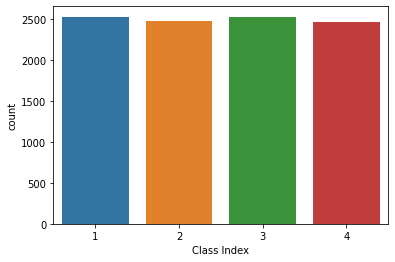

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
# plot distributión by class

sns.countplot(x='Class Index', data=train_sample)
plt.show()




Preparad y preprocesad los datos para el entrenamiento. Utilizaremos one-hot encoding por las etiquetas.

In [ ]:
#!pip install sklearn

In [ ]:


from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

values = array(data_labels)
print(values)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)


[2 2 1 ... 1 4 4]
[1 1 0 ... 0 3 3]
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


## 2.1 Preparar datos y embeddings para entrenar (1 punto)
La idea del modelo de clasificación que queremos implementar es más simple que la del encoder-decoder usado en el apartado 1.

El modelo debe consistir sólo en:

- una capa embedding con los pesos del modelo Glove preentrenado para el inglés disponible en el archivo 'glove.42B.300d.txt'
- una capa LSTM con un número de units a elegir (por ejemplo, 300)
- una capa Dense con una dimensión de salida que tiene el número de categorías con las que queremos clasificar (en este caso, 4).
- Además, como loss function `loss` utilizaremos 'categorical_crossentropy' y como `optimizer`, 'adam'.

Primeramente creamos un tokenizador para las frases del clasificador

In [ ]:
#############################################
# SOLUCIÓN                                #
#############################################

from keras.preprocessing.text import Tokenizer


def tokenization(sentences):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    return tokenizer



Cargamos el siguiente modelo GloVe para el inglés. Lo hemos utilizado en la parte 1.

In [ ]:
# Download trainning data from https://nlp.stanford.edu/projects/glove/ to data/glove/
#!wget https://nlp.stanford.edu/data/glove.42B.300d.zip


--2022-06-12 22:41:59--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Resolviendo nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Conectando con nlp.stanford.edu (nlp.stanford.edu)[171.64.67.140]:443... conectado.
Petición HTTP enviada, esperando respuesta... 301 Moved Permanently
Ubicación: http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [siguiente]
--2022-06-12 22:42:00--  http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolviendo downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Conectando con downloads.cs.stanford.edu (downloads.cs.stanford.edu)[171.64.64.22]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 1877800501 (1,7G) [application/zip]
Guardando como: ‘glove.42B.300d.zip’

glove.42B.300d.zip  100%[===================>]   1,75G  3,07MB/s    en 8m 41s  

2022-06-12 22:50:41 (3,44 MB/s) - ‘glove.42B.300d.zip’ guardado [1877800501/1877800501]



In [ ]:
#!unzip glove.42B.300d.zip -d data/glove/

Archive:  glove.42B.300d.zip
  inflating: data/glove/glove.42B.300d.txt  


In [ ]:
# load GloVe model

# load GloVE model
glove_dir = 'data/glove/'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.42B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


Una vez cargado el modelo de GloVe definimos la capa de Embedding con todos sus pesos


In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
# define embeddin layer with all weights from GloVe model
embedding_layer = Embedding(len(en_tokenizer.word_index) + 1,
                            embedding_vec_length,
                            weights=[embedding_matrix],
                            input_length=max_text_length,
                            trainable=False,
                            mask_zero=True)
                            


NameError: name 'embedding_matrix' is not defined

Preparamos el corpus de entrenamiento y test, usando el model_selection de sklearn, y el onehot_encoded para las clases. Usamos 80% para train. 

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
# preparate train and test corpus using model_selection of sklearn
from sklearn.model_selection import train_test_split



Codificar los vectores de entrada para el train y para el text

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################




## 2.2 Definir el modelo y entrenar (1 punto).

El modelo debe consistir sólo en:

+ una capa embedding con los pesos del modelo Glove preentrenado para el inglés disponible en el archivo 'glove.42B.300d.txt'
+ una capa LSTM con un número de units a elegir (por ejemplo, 300)
+ una capa Dense con una dimensión de salida que tiene el número de categorías con las que queremos clasificar (en este caso, 4).

Además, como loss function utilizaremos 'categorical_crossentropy' y como optimizer, 'adam'.

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
# create a model
model = Sequential()
# weights in file glove.42B.300d.txt
model.add(Embedding(len(en_tokenizer.word_index) + 1,
                    embedding_vec_length,
                    weights=[embedding_matrix],
                    input_length=max_text_length,
                    trainable=False,
                    mask_zero=True))
# one LSTM layer with 300 units 
model.add(LSTM(300, return_sequences=True))
# one dense layer with output units of 4
model.add(Dense(4, activation='softmax'))



2022-06-13 01:04:27.447656: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:988] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 01:04:27.522738: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:988] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 01:04:27.522908: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:988] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 01:04:27.528477: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

NameError: name 'eng_tokenizer' is not defined

Compilar el modelo

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Entrenar y guardar el modelo. En esta sección aunque sea recomendable usar GPU, con CPU también se puede obtener el resultado sin tener que esperar "mucho" tiempo

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
# save the model
model.save('model.h5')

# train the model
model.fit(train_X_es, train_y, epochs=10, batch_size=32, verbose=1)



## 2.3 Evaluar el modelo (1 punto)
Se evalua el modelo y se obtienen sus diferentes métricas. 

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################



¿Que pasaría si el modelo de clasificación lo entrenaramos con más datos?
¿Y si no usaramos los embeddings de Glove? ¿Que nos aportan ambas cosas?
¿Si usamos más datos hacen falta usar los embeddings?

Expresar vuestra opinión con una mínima experimentación para obtener las conclusiones.



# PARTE 3



# 3. Detección de NER (3 puntos)

En esta parte intentaremos entrenar y detectar entidades nombradas utilizando tanto SpaCy con transformers como transformers simplemente usando una librería llamada simple transformers.

Por otro lado, también haremos Named Entity Linking (NEL) donde buscaremos entidades linkadas a una base de conocimiento (KB), en este caso DBpedia. Encontraremos los enlaces a Wikpedia de ciertas entidades del texto, utilizando DBPedia Spotlight.

## 3.1 Detección de NER con spaCy (2 puntos)

En esta sección usaremos spaCy para detectar NER. A partir de un corpus de CONLL 2003, lo reeentrenaremos y de esta manera afinaremos su cobertura para estas clases. 

Instalamos spacy y mos modelos de lenguaje que necesitemos. 

In [ ]:
#!pip install spacy==3.2.0

#!python -m spacy download en_core_web_sm-3.2.0 --direct

Definimos un par de funciones que nos va a permitir imprimir los resultados de la detección de NER de forma muy interpretable

In [ ]:
def get_tokens_to_print(model, text):
  """Print tokens of the text and its relevant attributes.

    Parameters:
      model (spaCy model): spaCy model used for tokenization
      text (str):  text to transform in a spaCy doc class.

    Returns: ---
  """
  doc = model(text)
  print (f"The text:\n\n{get_text_to_print(text)}\n\nwas converted in a spaCy object: {type(doc)}\n")
  print (f"Token-based analysis. Each token is a spaCy object: {type(doc[0])}\n")
  
  # Obtener las filas para imprimir
  rows  = []
  # head_align: Lista de tuplas. Cada tupla: Cabecera de la columna y su alineación al imprimir
  head_align  = [('Token', '<'), ('Lemma', '<'), ('Syntactic parent', '<'), ('#Tok', '>'), ('Chr_Start', '>'), ('Chr_End', '>'), ('POS', '<'), 
                 ('TAG', '<'), ('TAG meaning:', '<'), ('ENT', '<'), ('DEP', '<'), ('DEP meaning:', '<')]   
  head, align = list(zip(*head_align))  
  rows.append(head)                           
  rows.append(['='*len(i) for i in head])     
  for tok in doc:
    rows.append([tok.text, tok.lemma_, tok.head.text, str(tok.i), str(tok.idx), str(tok.idx+len(tok)-1), tok.pos_, 
                 tok.tag_, str(spacy.explain(tok.tag_))[:20], tok.ent_type_, tok.dep_, str(spacy.explain(tok.dep_))[:20]])
  
  # Ancho de cada columna: igual al elemento más ancho de la columna
  columns       = zip(*rows)     
  column_widths = [max(len(i) for i in col) for col in columns]

  # Imprimir 
  for row in rows:
    print(*[f"{row[i]:{align[i]}{column_widths[i]}}  " for i in range(0, len(row))])

In [ ]:
def get_text_to_print(text):
  """Format given text.

    Parameters:
      text (str): text to print

    Returns:
      str: text formatted in 100 character lines with an initial line numbering the characters
  """
  line_length = 100
  line_poss   = "     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100"
  text        = text.replace("\n", " ")     
  text        = text.replace("\r", " ")     
  text_format = "\n".join([ f"{i//line_length:<5}{text[i:i+line_length]}"  for i in range(0, len(text), line_length) ])
  return line_poss + "\n" + text_format + "\n" + line_poss

In [ ]:
import spacy

2022-06-12 23:56:20.216705: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2022-06-12 23:56:20.957660: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.0: cannot open shared object file: No such file or directory
2022-06-12 23:56:20.957776: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-06-12 23:56:20.957784: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


Cargamos el modelo "en_core_web_sm"

In [ ]:
##################
## SOLUCION ####
##################
# load model "en_core_web_sm"
model = spacy.load("en_core_web_sm")

Convertimos un texto en objecto 'Doc' de spaCy y visualizamos los resultados de analizar este texto a nivel de POS, NER, ENT, DEP... 

In [ ]:
##################
## SOLUCION ####
##################
# convert text to spaCy doc class
# process a text and create a Doc object
doc = model(
    "The greatness of a nation and its moral progress can be judged by the way its animals are treated.")
for chunk in doc.noun_chunks:       # iterate over the noun chunks in the Doc
   print(chunk.text)




The greatness
a nation
its moral progress
the way
its animals


In [ ]:
# visualizar los resultados de analizar este texto a nivel de POS
get_tokens_to_print(
    model, "The greatness of a nation and its moral progress can be judged by the way its animals are treated.")


The text:

     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100
0    The greatness of a nation and its moral progress can be judged by the way its animals are treated.
     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100

was converted in a spaCy object: <class 'spacy.tokens.doc.Doc'>

Token-based analysis. Each token is a spaCy object: <class 'spacy.tokens.token.Token'>

Token       Lemma       Syntactic parent   #Tok   Chr_Start   Chr_End   POS     TAG    TAG meaning:           ENT   DEP         DEP meaning:          
=====       =====       ================   ====   =========   =======   ===     ===    ============           ===   ===         ============          
The         the         greatness             0           0         2   DET     DT     determiner                   det         determiner            
greatness   greatness   judged                1           4       

In [ ]:
spacy.displacy.render(doc, style="ent")

/home/oscar/Documentos/oscar/nlp/nlp/my_venv_NLP/lib/python3.10/site-packages/spacy/displacy/__init__.py:192: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [ ]:
# displacy 
spacy.displacy.render(doc, style="dep")

Entrenar un nuevo modelo de NER con los datos de CONLL2003

Convertimos los ficheros conll03 (train y valid) a formato spaCy. 
El corpus lo hemos obtenido de aquí:
https://github.com/Hironsan/anago

Nota: spacy contiene funciones que permiten convertir de formato conll al formato compilado que necesitan el módulo de train de spaCy. 


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
# !mkdir data/ner/conll03/conll2003_json
!python -m spacy convert -c ner -b en -n 10 data/ner/conll03/train.txt data/ner/conll03/conll2003_json
!python -m spacy convert -c ner -b en -n 10 -l en data/ner/conll03/valid.txt data/ner/conll03/conll2003_json

2022-06-12 23:19:58.793235: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-12 23:19:59.482304: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.0: cannot open shared object file: No such file or directory
2022-06-12 23:19:59.482366: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-06-12 23:19:59.482374: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, p

In [ ]:
#####################
### SOLUCION ###
##################
# convert train.txt and valid to spacy format
# load model "en_core_web_sm"



Python 3.10.4 (main, Apr  2 2022, 09:04:19) [GCC 11.2.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
KeyboardInterrupt
>>> Python 3.10.4 (main, Apr  2 2022, 09:04:19) [GCC 11.2.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 

In [ ]:

x_train, y_train = load_data_and_labels('data/ner/conll03/train.txt')
x_test, y_test = load_data_and_labels('data/ner/conll03/test.txt')
x_train[0]



NameError: name 'load_data_and_labels' is not defined

In [ ]:
model.fit(x_train, y_train, epochs=15)


Descargar el modelo 'en_core_web_trf'

In [ ]:
!python -m spacy validate

2022-06-12 23:22:02.506927: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-12 23:22:03.277193: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.0: cannot open shared object file: No such file or directory
2022-06-12 23:22:03.277330: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-06-12 23:22:03.277339: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, p

In [ ]:
import spacy
print (f"Spacy version installed: {spacy.__version__}")

Spacy version installed: 3.2.0


In [ ]:
#!python -m spacy download en_core_web_trf
model_trf = spacy.load("en_core_web_trf")

Entrenar usando la función train de spaCy a partir del modelo 'en_core_web_trf'. 
Usar el fichero de configuración adjunto y modificar las cosas que consideréis oportundas. La versión entregada ya funciona pero se puede customizar si hay interés. 

In [ ]:
# train model using spaCy's built-in training
model_trf.fit(x_train, y_train)



In [ ]:
##################
### SOLUCION ###
################

# use data/ner/conll03/config.cfg to load the model
#model = spacy.load("en_core_web_trf", config="data/ner/conll03/config.cfg")
model = spacy.load("en_core_web_trf")


Predecir una frase de ejemplo con el nuevo modelo y visualizar los resultados. 
Ojo que colab, no le gusta cargar modelos desde paths, solo si estan en local. con lo que recomendamos, generar el modelo en drive, guardarlo y luego subir la mejor versión para cargarlo desde de aquí. 


In [ ]:
##################
### SOLUCION ###
################
# predict a new phrase with the model
# process a text and create a Doc object



Evaluar los resultados obtenidos y calcular las métricas

In [ ]:
############ 
###SOLUCION##
##############



## 3.2 Detección y entrenamiento de NER con Simple Transformers (0.5 punto)

Probaremos de entrenar un modelo también haciendo uso de Transformers para la detección de NER pero sin usar SPACY. 
En este caso, usaremos Simple Transformers, la documentación está aquí:

https://simpletransformers.ai/docs/ner-model/

Es una manera de generar modelos sencilla. 

En primera instancia prepararemos el dataset que utilizaremos. Utilizaremos el CONLL2003.
El corpus lo hemos obtenido de aquí:
https://github.com/Hironsan/anago

El dataset debe estar como una lista de listas. Donde cada lista contiene el número de la frase, el token y si es NER o no en el formato BIO.

In [ ]:
def create_dataset(dataset):
    f = open(dataset, "r")
    num_sentence=0

    doc=[]
    for i in f:

        frase=i.strip()
  
        if (num_sentence < 1500):
            if len(frase)==0:
                num_sentence=num_sentence+1

            else:
                #print ("no empty", frase)
                dos=frase.split("\t")

                if (len(dos)==2):
                    #print (sentence, dos[0], dos[1])
                    l=[num_sentence, dos[0],dos[1]]
                    doc.append(l)
    print (num_sentence)            
    return doc

train_data=create_dataset("data/ner/conll03/train.txt")
eval_data=create_dataset("data/ner/conll03/test.txt")
print (eval_data[0:10])
print (len(eval_data))

1500
1500
[[0, 'SOCCER', 'O'], [0, '-', 'O'], [0, 'JAPAN', 'B-LOC'], [0, 'GET', 'O'], [0, 'LUCKY', 'O'], [0, 'WIN', 'O'], [0, ',', 'O'], [0, 'CHINA', 'B-PER'], [0, 'IN', 'O'], [0, 'SURPRISE', 'O']]
21460


Convertiremos el dataset con las mismas columnas que hay en los archivos de train/test a un dataframe de Pandas. Donde está el identificador de la frase, palabra, etiqueta.

In [ ]:
############################
##### SOLUCION #####
########################
# convert train_data to dataframe
train_data[0]
# convert train_data to dataframe
train_data_df = pd.DataFrame(train_data, columns=["fras", "palabra", "etiqueta"])
eval_data_df = pd.DataFrame(eval_data, columns=["fras", "palabra", "etiqueta"])


Importamos el paquete simple transformers y creamos un modelo NER, basado en bert, y con los siguientes parámetros como argumentos:
"overwrite_output_dir": True
"reprocess_input_data": True

Le decimos que no use GPU (use_cuda=False) en caso de no tener disponible. En caso de tener GPU disponible podemos indicar use_cuda=True


In [ ]:
from collections import Iterable


ImportError: cannot import name 'Iterable' from 'collections' (/usr/lib/python3.10/collections/__init__.py)

In [ ]:
################################
####### SOLUCION #######
##################################
# import simple transformers
from simpletransformers.ner import NERModel


ImportError: cannot import name 'Iterable' from 'collections' (/usr/lib/python3.10/collections/__init__.py)

In [ ]:

model = NERModel("bert", "bert-base-cased", num_labels=3, use_cuda=False, args={"overwrite_output_dir": True, "reprocess_input_data": True})


Entrenamos el modelo

In [ ]:
################################
####### SOLUCION #######
##################################
# train model
model.train_model(train_data_df, eval_data=eval_data_df, output_dir="data/ner/conll03/model")



Evaluamos el modelo

In [ ]:
################################
####### SOLUCION #######
##################################
# evaluate model
model.evalute_model(eval_data_df, output_dir="data/ner/conll03/model")





Imprimimos los resultados y vemos algun ejemplo para ver que pinta tiene el uso de este modelo

In [ ]:
################################
####### SOLUCION #######
##################################
# print model's predictions
model.predict("The greatness of a nation and its moral progress can be judged by the way its animals are treated.")



Que diferencias claras ves entre este modelo y el modelo anterior donde se ha usado SPACY? 

## 3.3 NEL (0.5 punto)

En esta sección, la idea es obtener los enlaces en la DBpedia spotlight relacionados con las entidades que se han obtenido de NER usando SPACY. 






Desarrolla una función que dado un texto, te obtenga automáticamente las entidades relacionadas en el DBpedia Spotlight.

URL de acceso a la API, DBPedia inglés: https://www.dbpedia-spotlight.org/api o https://www.dbpedia-spotlight.org/api/en  

In [ ]:
#!pip install spacy-dbpedia-spotlight

In [ ]:
##############################
# SOLUCIÓN #
########################

import spacy_dbpedia_spotlight

# create a function that with a text returns the entities relationed in DBpedia Spotlight
def get_entities(text):
    # load model "en_core_web_sm"
    model = spacy.load("en_core_web_sm")
    # add the pipeline stage
    model.add_pipe('dbpedia_spotlight')
    # process a text and create a Doc object
    doc = model(text)
    # iterate over the entities in the Doc
    entities = []
    for ent in doc.ents:
        # print the entity text and its label
        entities.append(ent.text + " " + ent.label_)
    return entities



['Google LLC DBPEDIA_ENT', 'American DBPEDIA_ENT']

In [ ]:

get_entities("Google LLC is an American multinational technology company.")



Prepara una función que a acceda a la función desarrollada anteriormente y analize un texto, teniendo en cuenta que se pueden configurar estos parametros:


+ confidence (float): score de confianza para la desambiguación
+ support (int): relevancia de la entidad, basada en los links de Wikipedia
+ dbpedia_lan (str): idioma de la wikipedia
+ list_types (list): listado de tipos que se van a filtar de acuerdo con la ontologia de la dbpedia(rdf:type). La lista puede ser vacía.
+ base_url: url DBPedia Spotlight API
+ action: acción definida en la API de la DBpedia (anotar, spot, candidates)

Todos estos parametros son parametros que coge la API de DBpedia, no hay que hacer ningún calculo especial, simplemente añadir la opción de poder jugar con ellos. 


In [ ]:
##############################
# SOLUCIO #
########################
# create a fucción with parammetres: confidence, support, dbpedia_lan, list_types, base_url, api_key, action
def get_entities_dbpedia_complete(text, confidence, support, dbpedia_lan, list_types, base_url, action):
    # load model "en_core_web_sm"
    model = spacy.load("en_core_web_sm")
    # add the pipeline stage
    model.add_pipe('dbpedia_spotlight', config={'confidence:': confidence, 'support': support,
                   'dbpedia_lan': dbpedia_lan, 'list_types': list_types, 'base_url': base_url, 'action': action})
    # process a text and create a Doc object
    doc = model(text)
    # iterate over the entities in the Doc
    entities = []
    for ent in doc.ents:
        # print the entity text and its label
        entities.append(ent.text + " " + ent.label_)
    return entities


get_entities_dbpedia_complete("Google LLC is an American multinational technology company.", 0.5, 0.5, 'en', [
                              'Person', 'Organization'], 'http://spotlight.sztaki.hu:2222/rest/annotate', 'annotate')


ConfigValidationError: 

Config validation error

dbpedia_spotlight -> action      extra fields not permitted
dbpedia_spotlight -> base_url    extra fields not permitted
dbpedia_spotlight -> confidence:   extra fields not permitted
dbpedia_spotlight -> dbpedia_lan   extra fields not permitted
dbpedia_spotlight -> list_types   extra fields not permitted

{'nlp': <spacy.lang.en.English object at 0x7ff8258db1c0>, 'name': 'dbpedia_spotlight', 'action': 'annotate', 'base_url': 'http://spotlight.sztaki.hu:2222/rest/annotate', 'confidence': None, 'confidence:': 0.5, 'dbpedia_lan': 'en', 'dbpedia_rest_endpoint': None, 'debug': False, 'language_code': None, 'list_types': ['Person', 'Organization'], 'overwrite_ents': True, 'policy': None, 'process': 'annotate', 'raise_http_errors': True, 'span_group': 'dbpedia_spotlight', 'sparql': None, 'support': 0.5, 'types': None, '@factories': 'dbpedia_spotlight'}

A partir de un texto de ejemplo, calcular los enlaces de DBpedia y visualizarlos. 

[('Google LLC', 'http://dbpedia.org/resource/Google', '0.9999328485676318'), ('American', 'http://dbpedia.org/resource/United_States', '0.09980165642452506')]


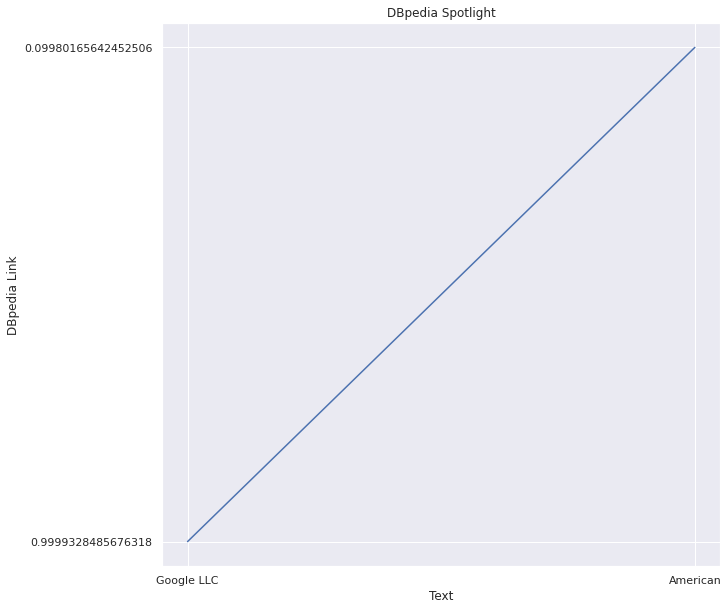

In [ ]:
##############################
# SOLUCIÓN #
########################
# From text, calculate DBpedia links
text = "Google LLC is an American multinational technology company."
model = spacy.load("en_core_web_sm")
# add the pipeline stage
model.add_pipe('dbpedia_spotlight', config={'process': 'candidates'})
# process a text and create a Doc object
doc = model(text)
print([(ent.text, ent.kb_id_, ent._.dbpedia_raw_result['resource']
      ['@contextualScore']) for ent in doc.ents])

# plot the results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 10))
plt.title("DBpedia Spotlight")
plt.xlabel("Text")
plt.ylabel("DBpedia Link")
plt.plot([ent.text for ent in doc.ents], [ent._.dbpedia_raw_result['resource']['@contextualScore'] for ent in doc.ents])
plt.show()

